In [17]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None

In [18]:
# Load the datasets
weather_data = pd.read_csv('RGK v1 - Weather Data.csv')
stimp_data = pd.read_csv('RGK v1 - Stimp (3).csv')
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')
june_report_data = pd.read_csv('junereport.csv')

# Display the first few rows of each dataset to understand their structure
print("Weather Data:")
print(weather_data.head())

print("\nStimp Data:")
print(stimp_data.head())

print("\nKlippelog Data:")
print(klippelog_data.head())

print("\nJune Report Data:")
print(june_report_data.head())

Weather Data:
         Dato  Min  Max  Humidity Pricipitation Describtion  Winddirection
0  17/03/2024    3    6        54             0   clear sky            336
1  17/03/2024    3    6        54             0   clear sky            336
2  17/03/2024    3    6        56             0   clear sky            340
3  17/03/2024    2    5        61             0  few clouds            350
4  17/03/2024    1    4        68             0  few clouds              1

Stimp Data:
         Dato     Hul  Stimp CM Stimp F  Bobble  Chatter  Snaking  Trueness
0  10/05/2023  Hul 15     249.0     8,2     NaN      NaN      NaN       NaN
1  10/05/2023  Hul 15     246.0     8,1     NaN      NaN      NaN       NaN
2  10/05/2023  Hul 15     248.0     8,1     NaN      NaN      NaN       NaN
3  10/05/2023  Hul 15     273.0     9,0     NaN      NaN      NaN       NaN
4  10/05/2023  Hul 15     280.0     9,2     NaN      NaN      NaN       NaN

Klippelog Data:
         Dato Retning  Hul Liter Maskine Højde Bem

   Week  Liter
0    22  256.5
1    23  842.5
2    24  724.5
3    25  794.5
4    26  772.0


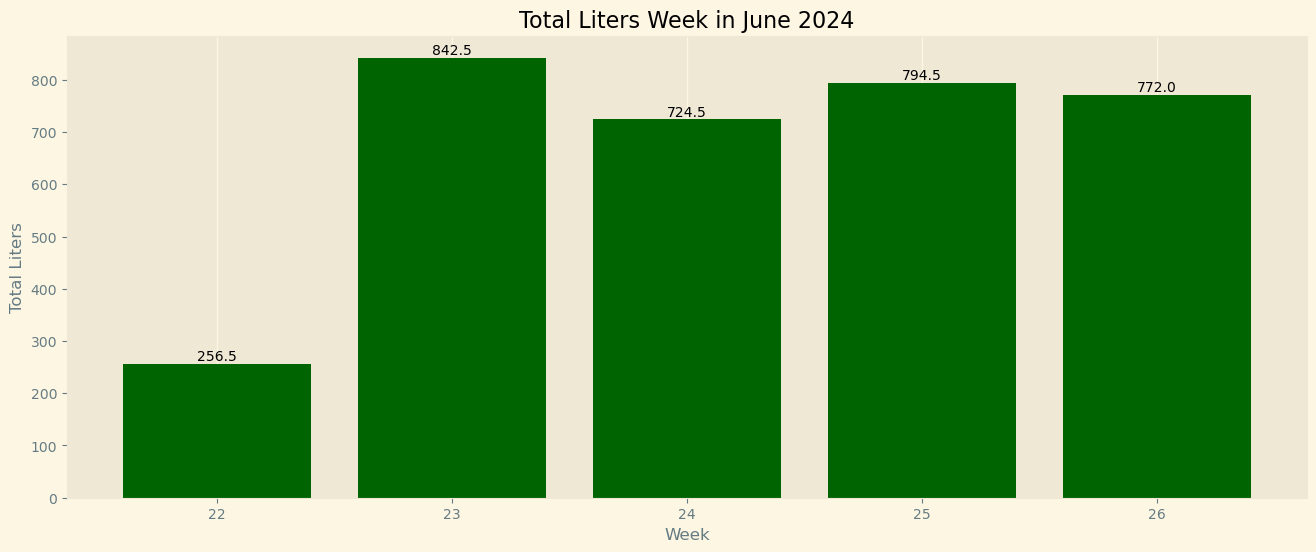

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Klippelog dataset
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')

# Convert 'Dato' column to datetime format
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], dayfirst=True)

# Filter data for June 2024
june_klippelog = klippelog_data[(klippelog_data['Dato'].dt.month == 6) & (klippelog_data['Dato'].dt.year == 2024)]

# Function to clean and convert 'Liter' values to numeric
def clean_liter_values(liter_series):
    # Replace commas with periods and remove any non-numeric characters
    cleaned_values = liter_series.replace(',', '.', regex=True).replace(r'[^\d.]', '', regex=True)
    return pd.to_numeric(cleaned_values, errors='coerce')

# Clean the 'Liter' column
june_klippelog['Liter'] = clean_liter_values(june_klippelog['Liter'])

# Group by week and calculate the total sum of 'Liter'
june_klippelog['Week'] = june_klippelog['Dato'].dt.isocalendar().week
june_weekly_sum = june_klippelog.groupby('Week')['Liter'].sum().reset_index()

# Print the result for verification
print(june_weekly_sum)

# Ensure the week column is integer for proper plotting
june_weekly_sum['Week'] = june_weekly_sum['Week'].astype(int)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(16, 6))
bars = plt.bar(june_weekly_sum['Week'], june_weekly_sum['Liter'], color='#006400')  # Dark green color
plt.xlabel('Week')
plt.ylabel('Total Liters')
plt.title('Total Liters Week in June 2024')
plt.xticks(june_weekly_sum['Week'])
plt.grid(axis='y')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


Total Liters in June 2024: 3390.0


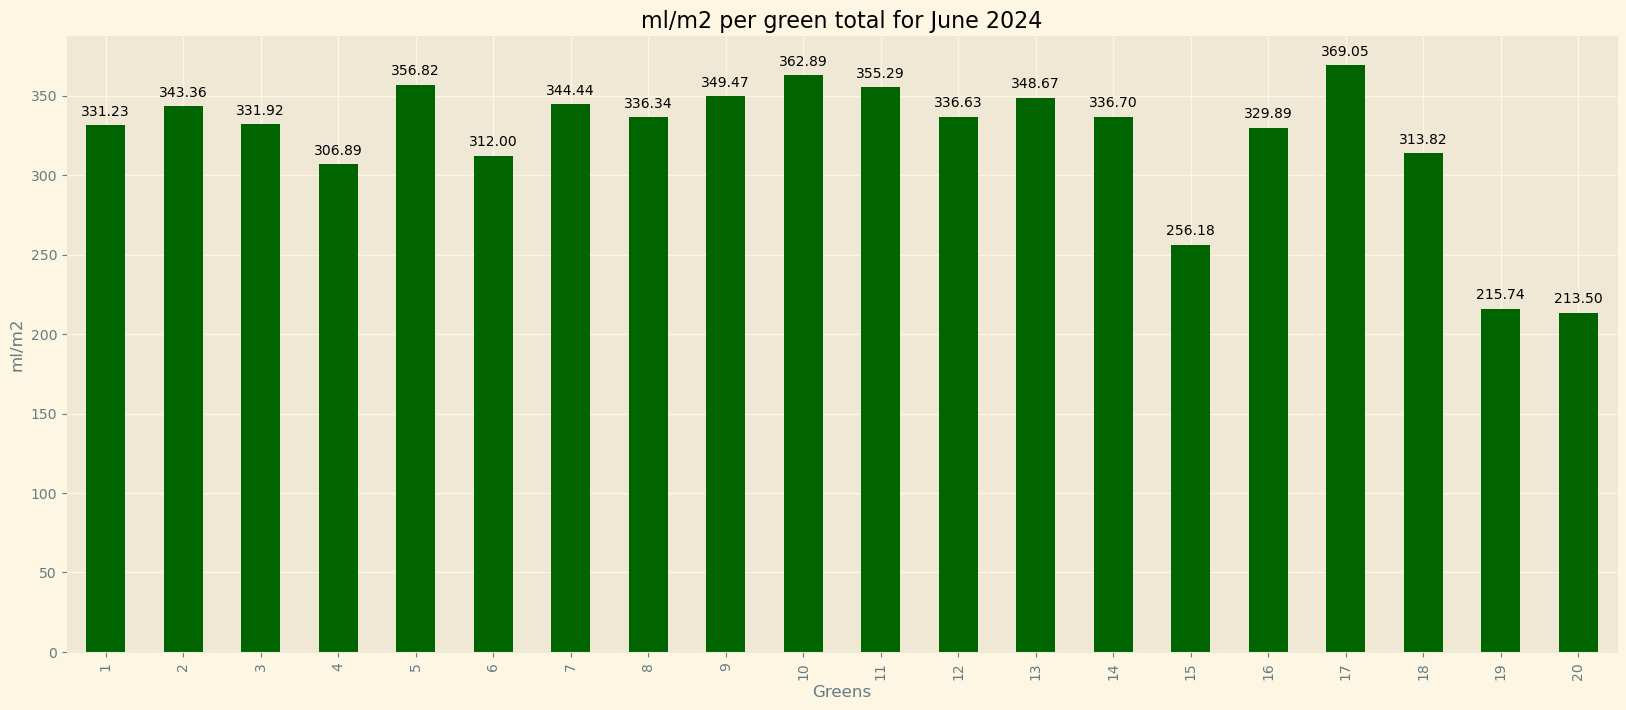

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Klippelog dataset
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')

# Convert 'Dato' column to datetime format
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], format='%d/%m/%Y', errors='coerce')

# Extract the year and month from 'Dato' column
klippelog_data['Year'] = klippelog_data['Dato'].dt.year
klippelog_data['Month'] = klippelog_data['Dato'].dt.month

# Filter data for June 2024
df_june_2024 = klippelog_data[(klippelog_data['Year'] == 2024) & (klippelog_data['Month'] == 6)]

# Assuming 'Hul' represents 'Greens' and we have a predefined size for each green
green_sizes = {
    1: 455.87, 2: 482, 3: 589, 4: 668, 5: 447, 6: 625, 7: 585, 8: 443, 9: 475, 10: 485,
    11: 425, 12: 658, 13: 489, 14: 545, 15: 728, 16: 532, 17: 504, 18: 427, 19: 737, 20: 274
}

# Map the sizes to the dataframe
df_june_2024['Size_m2'] = df_june_2024['Hul'].map(green_sizes)

# Convert 'Liter' to numeric, coerce errors to NaN, and fill them with 0
df_june_2024['Liter'] = pd.to_numeric(df_june_2024['Liter'].str.replace(',', '.'), errors='coerce').fillna(0)

# Calculate ml_per_m2
df_june_2024['ml_per_m2'] = (df_june_2024['Liter'] * 1000) / df_june_2024['Size_m2']

# Group by 'Hul' to sum the total liters and calculate ml_per_m2 per green
grouped_june_2024 = df_june_2024.groupby('Hul').agg({'Liter': 'sum', 'Size_m2': 'first'})
grouped_june_2024['ml_per_m2'] = (grouped_june_2024['Liter'] * 1000) / grouped_june_2024['Size_m2']

# Ensure all liters are summed correctly
total_liters_june_2024 = df_june_2024['Liter'].sum()
print(f"Total Liters in June 2024: {total_liters_june_2024}")

# Plot the bar chart
bar_plot = grouped_june_2024['ml_per_m2'].plot.bar(legend=False, color='darkgreen')

for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.xlabel('Greens')
plt.ylabel('ml/m2')
plt.title('ml/m2 per green total for June 2024')

plt.show()



Merged Data:
        Dato      Retning Hul Liter  Maskine Højde Bemærkning  Person Cleanup  \
0 2024-06-04  L/R AGAINST   1     5  Triplex     3        NaN  Adrian     Yes   
1 2024-06-04  L/R AGAINST   4     9  Triplex     3        NaN  Adrian     Yes   
2 2024-06-04  L/R AGAINST   5   6,5  Triplex     3        NaN  Adrian     Yes   
3 2024-06-04  L/R AGAINST   6    11  Triplex     3        NaN  Adrian     Yes   
4 2024-06-04  L/R AGAINST   7    10  Triplex     3        NaN  Adrian     Yes   

  Brush  ... Moisture (Max) (%) EC (Avg) (dS/m) EC (Min) (dS/m)  \
0    No  ...                 22            0.12            0.10   
1    No  ...                 27            0.16            0.11   
2    No  ...                 22            0.13            0.08   
3    No  ...                 22            0.14            0.10   
4    No  ...                 22            0.13            0.11   

  EC (Max) (dS/m)  Temperature (Avg) (°C)  Temperature - Min (°C)  \
0            0.20           

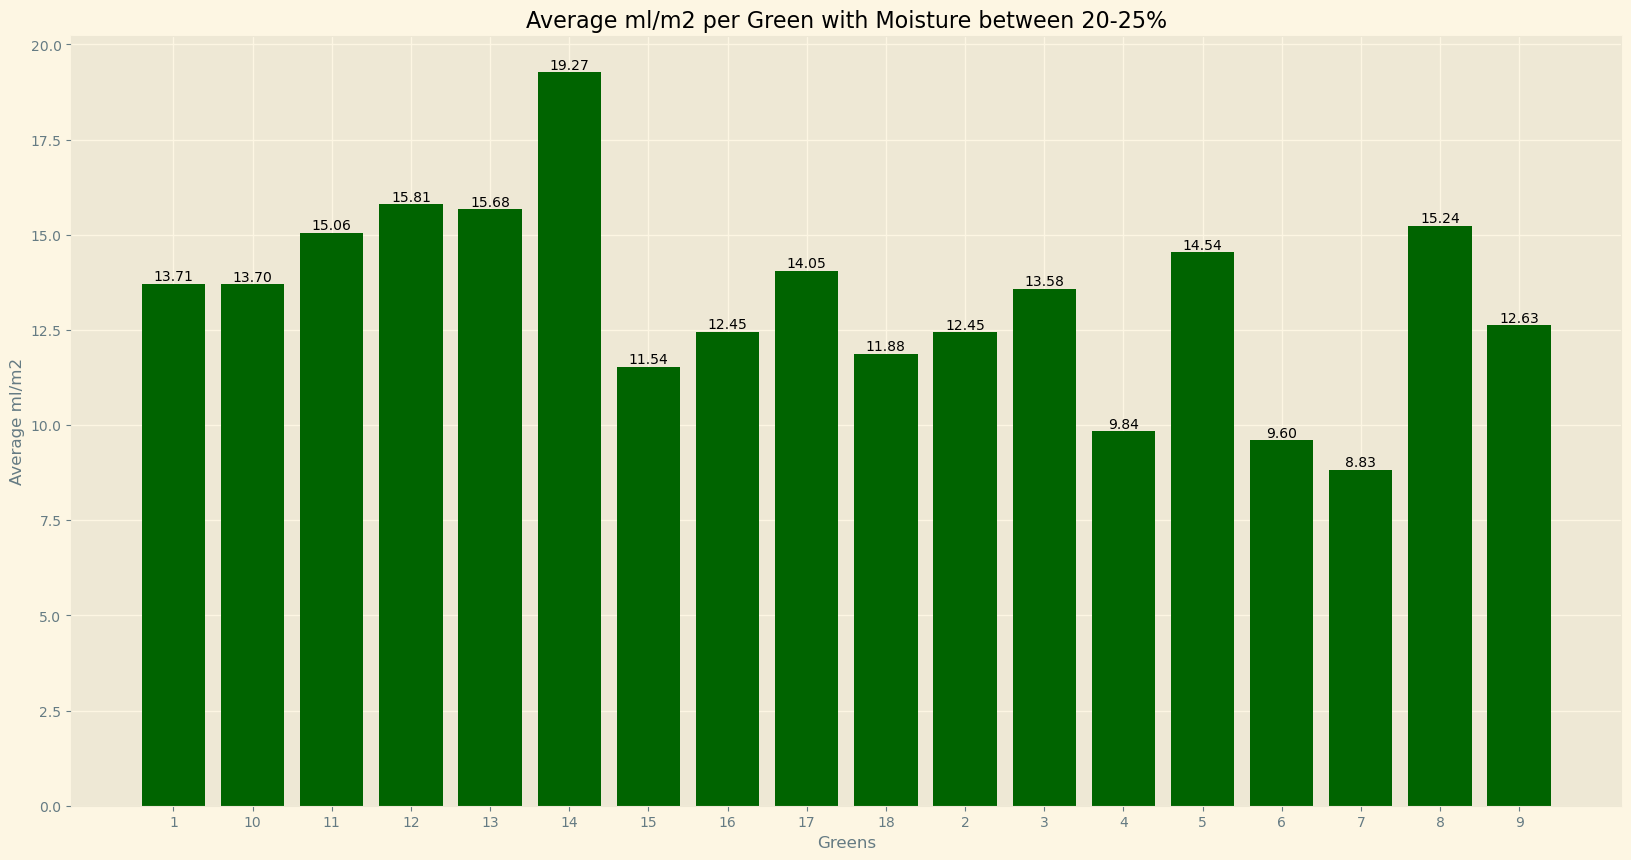

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')
june_report_data = pd.read_csv('junereport.csv')

# Convert 'Dato' column to datetime format in Klippelog dataset
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], format='%d/%m/%Y', errors='coerce')

# Convert 'Sample Date' column to datetime format in June report dataset
june_report_data['Sample Date'] = pd.to_datetime(june_report_data['Sample Date'], errors='coerce')

# Extract the date part from 'Sample Date'
june_report_data['Date'] = june_report_data['Sample Date'].dt.date

# Extract the date part from 'Dato' in klippelog_data to match with 'Date' from june_report_data
klippelog_data['Date'] = klippelog_data['Dato'].dt.date

# Clean the 'Zone' column in June report data to extract the green number
june_report_data['Hul'] = june_report_data['Zone'].str.extract('(\d+)').astype(int).astype(str)

# Ensure 'Hul' columns are of the same type (string) in both datasets
klippelog_data['Hul'] = klippelog_data['Hul'].astype(str)

# Merge the datasets on the date and green (Hul)
merged_data = pd.merge(klippelog_data, june_report_data, left_on=['Date', 'Hul'], right_on=['Date', 'Hul'], how='inner')

# Debugging: Print the first few rows of the merged data
print("Merged Data:")
print(merged_data.head())

# Filter for moisture between 20-25% for each green
filtered_data = merged_data[(merged_data['Moisture (Avg) (%)'] >= 20) & (merged_data['Moisture (Avg) (%)'] <= 25)]

# Debugging: Print the first few rows of the filtered data
print("Filtered Data (Moisture 20-25%):")
print(filtered_data.head())

# Assuming 'Hul' represents 'Greens' and we have a predefined size for each green
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Map the sizes to the dataframe
filtered_data['Size_m2'] = filtered_data['Hul'].map(green_sizes)

# Convert 'Liter' to numeric, coerce errors to NaN, and fill them with 0
filtered_data['Liter'] = pd.to_numeric(filtered_data['Liter'].str.replace(',', '.'), errors='coerce').fillna(0)

# Calculate ml_per_m2
filtered_data['ml_per_m2'] = (filtered_data['Liter'] * 1000) / filtered_data['Size_m2']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = filtered_data.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green with Moisture between 20-25%')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()



Average ml/m2 per Green in June 2024 with Moisture between 18-24%:
   Hul  ml_per_m2
0    1  13.710049
1    2  14.107884
2    3  14.855688
3    4  11.227545
4    5  12.464046
5    6  10.800000
6    7  15.064103
7    8  12.133183
8    9  15.000000
9   10  14.089347
10  11  15.126050
11  12  15.197568
12  13  13.087935
13  14  14.067278
14  15  10.007849
15  16  16.917293
16  17  14.172336
17  18  10.392272


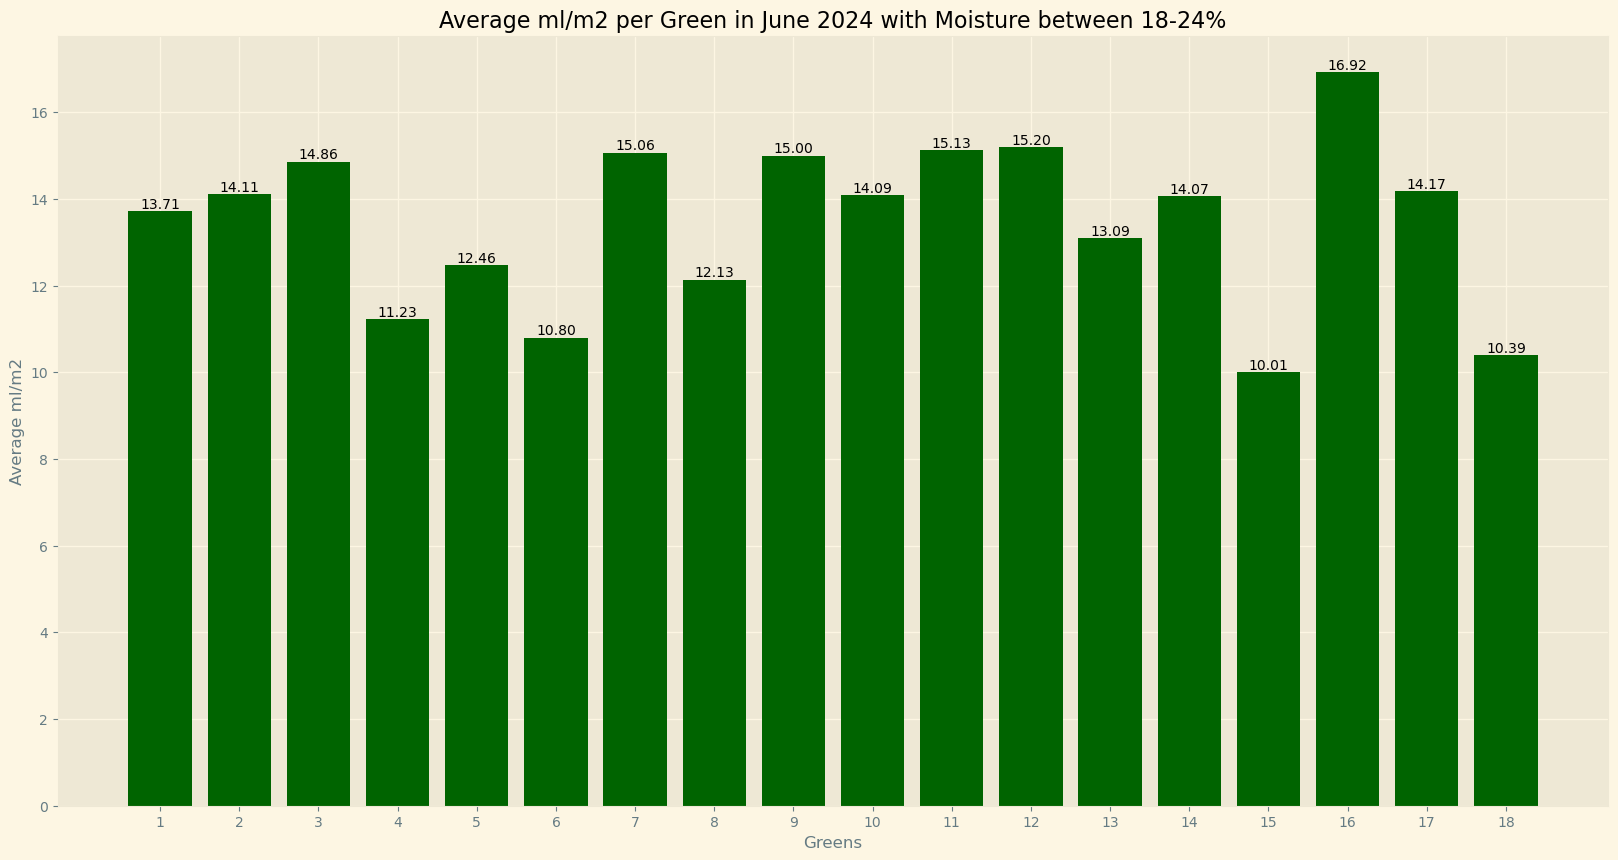

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')
june_report_data = pd.read_csv('junereport.csv')

# Convert 'Dato' column to datetime format in Klippelog dataset
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], format='%d/%m/%Y', errors='coerce')

# Convert 'Sample Date' column to datetime format in June report dataset
june_report_data['Sample Date'] = pd.to_datetime(june_report_data['Sample Date'], errors='coerce')

# Extract the date part from 'Sample Date'
june_report_data['Date'] = june_report_data['Sample Date'].dt.date

# Extract the date part from 'Dato' in klippelog_data to match with 'Date' from june_report_data
klippelog_data['Date'] = klippelog_data['Dato'].dt.date

# Filter for June 2024
klippelog_data_june_2024 = klippelog_data[(klippelog_data['Dato'].dt.year == 2024) & (klippelog_data['Dato'].dt.month == 6)]
june_report_data_june_2024 = june_report_data[(june_report_data['Sample Date'].dt.year == 2024) & (june_report_data['Sample Date'].dt.month == 6)]

# Clean the 'Zone' column in June report data to extract the green number
june_report_data_june_2024['Hul'] = june_report_data_june_2024['Zone'].str.extract('(\d+)').astype(int).astype(str)

# Ensure 'Hul' columns are of the same type (string) in both datasets
klippelog_data_june_2024['Hul'] = klippelog_data_june_2024['Hul'].astype(str)

# Merge the datasets on the date and green (Hul)
merged_data = pd.merge(klippelog_data_june_2024, june_report_data_june_2024, left_on=['Date', 'Hul'], right_on=['Date', 'Hul'], how='inner')

# Filter for moisture between 10-15% for each green
filtered_data = merged_data[(merged_data['Moisture (Avg) (%)'] >= 18) & (merged_data['Moisture (Avg) (%)'] <= 24)]

# Assuming 'Hul' represents 'Greens' and we have a predefined size for each green
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Map the sizes to the dataframe
filtered_data['Size_m2'] = filtered_data['Hul'].map(green_sizes)

# Convert 'Liter' to numeric, coerce errors to NaN, and fill them with 0
filtered_data['Liter'] = pd.to_numeric(filtered_data['Liter'].str.replace(',', '.'), errors='coerce').fillna(0)

# Calculate ml_per_m2
filtered_data['ml_per_m2'] = (filtered_data['Liter'] * 1000) / filtered_data['Size_m2']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = filtered_data.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all greens (1-20) are represented in the final dataframe
all_greens = pd.DataFrame({'Hul': [str(i) for i in range(1, 19)]})
average_ml_per_m2 = pd.merge(all_greens, average_ml_per_m2, on='Hul', how='left').fillna(0)

# Print the result
print("Average ml/m2 per Green in June 2024 with Moisture between 18-24%:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green in June 2024 with Moisture between 18-24%')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()




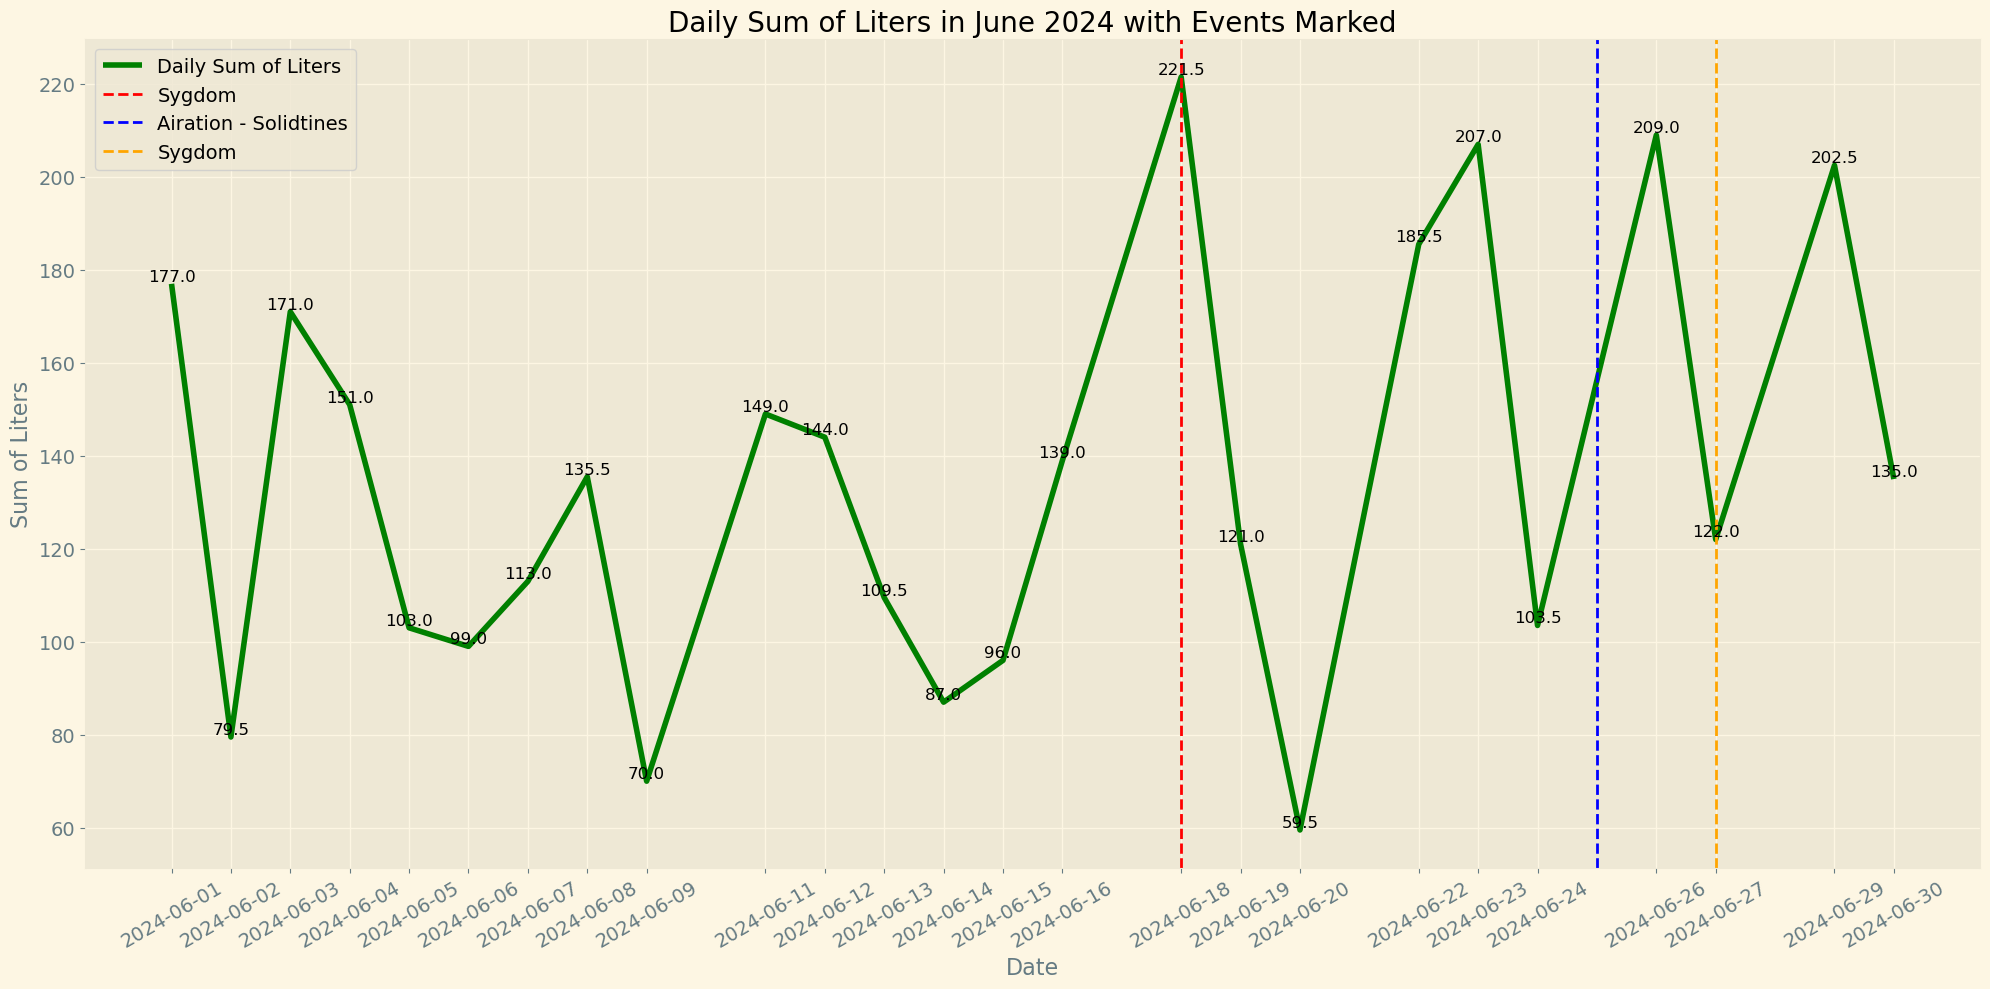

In [105]:
# Labels skal opdateres så de bliver størrer 

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')

# Convert 'Dato' column to datetime format
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], format='%d/%m/%Y', errors='coerce')

# Filter for June 2024
klippelog_data_june_2024 = klippelog_data[(klippelog_data['Dato'].dt.year == 2024) & (klippelog_data['Dato'].dt.month == 6)]

# Replace commas with dots and convert 'Liter' to numeric
klippelog_data_june_2024['Liter'] = klippelog_data_june_2024['Liter'].str.replace(',', '.').astype(float)

# Calculate daily sum of liters
daily_liters = klippelog_data_june_2024.groupby('Dato')['Liter'].sum().reset_index()

# Drop dates where the liter sum is 0
daily_liters = daily_liters[daily_liters['Liter'] > 0]

# Identify dates with "Bemærkning" and corresponding events
bemærkning_events = klippelog_data_june_2024.dropna(subset=['Bemærkning'])[['Dato', 'Bemærkning']].drop_duplicates()

# Plot the line graph
plt.figure(figsize=(20, 10))
plt.plot(daily_liters['Dato'], daily_liters['Liter'], label='Daily Sum of Liters', color='green', linewidth=4)

# Add dotted lines and labels for "Bemærkning" events
colors = ['red', 'blue', 'orange', 'purple', 'magenta', 'cyan']  # Complementary colors to green
for i, (date, event) in enumerate(bemærkning_events.itertuples(index=False)):
    plt.axvline(x=date, color=colors[i % len(colors)], linestyle='--', linewidth=2, label=event)

# Add data labels for each day
for x, y in zip(daily_liters['Dato'], daily_liters['Liter']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sum of Liters', fontsize=16)
plt.title('Daily Sum of Liters in June 2024 with Events Marked', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(daily_liters['Dato'], rotation=30, fontsize=14)  # Ensure all dates with liter sum are shown on the x-axis
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()




In [130]:
# Load the datasets
weather_data = pd.read_csv('RGK v1 - Weather Data.csv')
stimp_data = pd.read_csv('RGK v1 - Stimp (3).csv')
klippelog_data = pd.read_csv('RGK v1 - Klippelog (3).csv')
june_report_data = pd.read_csv('junereport.csv')

# Convert date columns to datetime format
weather_data['Dato'] = pd.to_datetime(weather_data['Dato'], dayfirst=True, errors='coerce')
stimp_data['Dato'] = pd.to_datetime(stimp_data['Dato'], format='%d/%m/%Y', errors='coerce')
klippelog_data['Dato'] = pd.to_datetime(klippelog_data['Dato'], format='%d/%m/%Y', errors='coerce')

# Replace commas with dots and convert 'Liter' to numeric in klippelog data
klippelog_data['Liter'] = klippelog_data['Liter'].str.replace(',', '.').astype(float)

# Replace commas with dots and convert 'Stimp F' to numeric
stimp_data['Stimp F'] = stimp_data['Stimp F'].str.replace(',', '.').astype(float)

# Convert 'Sample Date' column to datetime format in June report dataset
june_report_data['Sample Date'] = pd.to_datetime(june_report_data['Sample Date'], errors='coerce')

# Extract the date part from 'Sample Date' and ensure it's the same type as other date columns
june_report_data['Date'] = june_report_data['Sample Date'].dt.date
june_report_data['Date'] = pd.to_datetime(june_report_data['Date'])

# Clean the 'Zone' column in June report data to extract the green number
june_report_data['Hul'] = june_report_data['Zone'].str.extract('(\d+)').astype(int).astype(str)

# Ensure 'Hul' is of type string in the other datasets
klippelog_data['Hul'] = klippelog_data['Hul'].astype(str)
stimp_data['Hul'] = stimp_data['Hul'].astype(str)


In [131]:
# Filter Stimp data for values between 9.9 and 10.5
filtered_stimp_data = stimp_data[(stimp_data['Stimp F'] >= 9.9) & (stimp_data['Stimp F'] <= 10.5)]

# Merge filtered Stimp data with weather data on date
stimp_weather_merged = pd.merge(filtered_stimp_data, weather_data, left_on='Dato', right_on='Dato', how='left')

# Merge the result with klippelog data on date and Hul
stimp_weather_klippelog_merged = pd.merge(stimp_weather_merged, klippelog_data, left_on=['Dato', 'Hul'], right_on=['Dato', 'Hul'], how='left')

# Merge the result with June report data on date and green (Hul)
stimp_weather_klippelog_june_merged = pd.merge(stimp_weather_klippelog_merged, june_report_data, left_on=['Dato', 'Hul'], right_on=['Date', 'Hul'], how='left')

# Remove duplicates
stimp_weather_klippelog_june_merged.drop_duplicates(inplace=True)

In [135]:
# Sort the data by 'Stimp F'
sorted_stimp_data = stimp_weather_klippelog_june_merged.sort_values(by='Stimp F')

# Display the table
sorted_stimp_data_filtered = sorted_stimp_data[(sorted_stimp_data['Stimp F'] >= 9.9) & (sorted_stimp_data['Stimp F'] <= 10.5)]

# Drop columns that were added during merging and are redundant
sorted_stimp_data_filtered = sorted_stimp_data_filtered.drop(columns=['Date', 'Sample Date'])

# Display the filtered data
sorted_stimp_data_filtered.reset_index(drop=True, inplace=True)
sorted_stimp_data_filtered


,Dato,Hul,Stimp CM,Stimp F,Bobble,Chatter,Snaking,Trueness,Min,Max,...,Moisture (Max) (%),EC (Avg) (dS/m),EC (Min) (dS/m),EC (Max) (dS/m),Temperature (Avg) (°C),Temperature - Min (°C),Temperature (Max) (°C),Salinity Index (Avg),Salinity Index (Min),Salinity Index (Max)
0,2024-06-27,Hul 4,302.0,9.9,NaN,NaN,NaN,NaN,15,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-27,Hul 4,302.0,9.9,NaN,NaN,NaN,NaN,14,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-27,Hul 4,302.0,9.9,NaN,NaN,NaN,NaN,14,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-27,Hul 4,302.0,9.9,NaN,NaN,NaN,NaN,15,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-27,Hul 4,302.0,9.9,NaN,NaN,NaN,NaN,14,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2024-06-17,Hul 4,NaN,10.5,NaN,NaN,NaN,NaN,17,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,2024-06-17,Hul 4,NaN,10.5,NaN,NaN,NaN,NaN,15,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,2024-06-17,Hul 4,NaN,10.5,NaN,NaN,NaN,NaN,13,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,2024-06-17,Hul 4,NaN,10.5,NaN,NaN,NaN,NaN,17,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Drop alle uegnede columns 
 #-Bobble	Chatter	Snaking	Trueness, salinity . 
# find ud af hvordan man plotter for stimp 